In [447]:
import requests
import os
import lxml.html as html
import datetime
import pandas as pd
from bs4 import BeautifulSoup

In [321]:
import pandas as pd
import re

In [455]:
str(datetime.date.today())

'2020-11-01'

In [454]:
str(x)

'2020-11-01'

## EL UNIVERSAL

In [7]:
url = 'https://www.eluniversal.com.mx/'

In [12]:
links = '//div/p/a/@href'


In [8]:
response = requests.get(url)
response

<Response [200]>

In [529]:
def universal_data():
#This function generates a data frame from a request 
#made to the official page of the newspaper el universal, 
#the cleaning and the necessary changes are processed 
#to have a clean data frame
#doesn´t have inputs and return a dataframe with all news in El Universal
    try:
        url = 'https://www.eluniversal.com.mx/'
        response = requests.get(url)
        response
        home = response.content.decode('utf-8')
        parsed = html.fromstring(home)
        links = '//div/p/a/@href'
        links_universal = parsed.xpath(links)
        links2 = '//div/h2/a/@href'
        links_universal2 = parsed.xpath(links2)
        lista_universal = links_universal + links_universal2
        description = [i.replace('https://www.eluniversal.com.mx/','') for i in lista_universal]
        description = [i.split('/') for i in description]
    except:
        pass
   
    x, y =lista_universal, description
    notices = pd.DataFrame(lista_universal, columns = ['links'])
    notices['description'] = y
    notices['category'] = notices['description'].apply(lambda x: x[0])
    index_drop =notices[notices['category']== 'https:'].index
    notices.drop(index = index_drop, axis = 0, inplace = True)
    notices['description'] =  notices['description'].apply(lambda x: x[1].replace('-',' '))
    #notices['date'] = df['links'].apply(lambda x: datetime.date.today())
    notices['source'] = notices['links'].apply(lambda x: 'Universal')
    notices.reset_index(inplace = True, drop = True)
    notices['date'] = df['links'].apply(lambda x: datetime.date.today())
    return notices
        


In [670]:
universal = universal_data()
universal.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   links        41 non-null     object
 1   description  41 non-null     object
 2   category     41 non-null     object
 3   source       41 non-null     object
 4   date         41 non-null     object
dtypes: object(5)
memory usage: 1.7+ KB


In [672]:
df_universal = universal[['links','date', 'source', 'category', 'description']] 

In [674]:
df_universal.head()
#result obtained from the first function

,links,date,source,category,description
0,https://www.eluniversal.com.mx/nacion/bajo-res...,2020-11-01,Universal,nacion,bajo reserva expres 2020 el peor ano de yeidck...
1,https://www.eluniversal.com.mx/mundo/estados-u...,2020-11-01,Universal,mundo,estados unidos llega elecciones con fractura e...
2,https://www.eluniversal.com.mx/nacion/carta-de...,2020-11-01,Universal,nacion,carta de un cubrebocas mexicano
3,https://www.eluniversal.com.mx/opinion/mochila...,2020-11-01,Universal,opinion,mochilazo en el tiempo
4,https://www.eluniversal.com.mx/espectaculos/se...,2020-11-01,Universal,espectaculos,sean connery sufrio demencia senil en sus ulti...


In [507]:
def body_universal(link):
#this function does a scraping and obtains the text 
#of all the links that were obtained from the first function, 
#opens and overwrites a txt file
#this function has one input and return a txt file in the directory we are working on
    try:
        cuerpo = '//div/p/text()'
        response = requests.get(link)
        home = response.content.decode('utf-8')
        parsed = html.fromstring(home)
        cuerpo = parsed.xpath(cuerpo)
        cuerpo = cuerpo[0:-2]
        cuerpo = [i.replace('\n','') for i  in cuerpo]
        cuerpo = ''.join(cuerpo)
        archivo = open(str(datetime.date.today()) + 'Universal','a',encoding='utf-8')
        archivo.write(cuerpo + '\n')
        archivo.close()
    except:
        print('algo salio mal', response)
    return print('archivo txt generado')
    

In [676]:
#df_universal['links'].apply(body_universal)
#result obtain from second function

La primera funcion me generar un dataframe y la segunda un archivo txt con el body de las noticias

## Proceso

In [584]:
def proceso():
#This function generates a data frame from a request
#made to the official page of the newspaper 'Proceso',
#cleaning and necessary changes are processed
#to have a clean data frame with the link, the date and the source.
    url = 'https://www.proceso.com.mx/'
    response = requests.get(url)
    response
    home = response.content#.decode('utf-8')
    parsed = html.fromstring(home)
    links = '//div//article/div/a/@href'
    links_proceso1 = parsed.xpath(links)
    links_proceso2 = ['https://www.proceso.com.mx' +i  for i in links_proceso]
    proceso = pd.DataFrame(links_proceso2,columns = ['links'])
    proceso['date'] = proceso['links'].apply(lambda x: datetime.date.today())
    proceso['source'] = proceso['links'].apply(lambda x: 'Proceso')
    
    return  proceso

In [ ]:
def title_proceso(link):
#This function extract text from the links 
#in newspaper proceso

    cuerpo = '//div//article//h1/text()'
    response = requests.get(link)
    home = response.content#.decode('utf-8')
    parsed = html.fromstring(home)
    cuerpo = parsed.xpath(cuerpo)
    return cuerpo

In [681]:
def data_proceso(data):
#This function generates two columns with category and description 
#from the first data frame
    data['title'] = data['links'].apply(lambda x:title_proceso(x))
    data['title'] = data['title'].apply(lambda x: x[0])
    data['category'] = data['links'].apply(lambda x: x.split('https://www.proceso.com.mx/'))
    data['category'] = data['category'].apply(lambda x:x[1].split('/')[0])
    return data

    

In [639]:
#body 

In [660]:
def body_proceso(link):
opens and overwrites a txt file
#this function has one input and return a txt file 
#with body of the news in proceso in the directory we are working on
    try:
        cuerpo = '//div/p/text()'
        response = requests.get(link)
        home = response.content#.decode('utf-8')
        parsed = html.fromstring(home)
        cuerpo = parsed.xpath(cuerpo)
        cuerpo = cuerpo[:-5]
        cuerpo = ''.join(cuerpo)
        archivo = open(str(datetime.date.today()) + 'Proceso','a',encoding='utf-8')
        archivo.write(cuerpo + '\n')
        archivo.close()
    except:
        print('algo salio mal', response)
    return print('archivo txt generado')
    

In [677]:
#1
data = proceso()
data.head()

,links,date,source
0,https://www.proceso.com.mx/reportajes/2020/11/...,2020-11-01,Proceso
1,https://www.proceso.com.mx/nacional/2020/11/1/...,2020-11-01,Proceso
2,https://www.proceso.com.mx/nacional/estados/20...,2020-11-01,Proceso
3,https://www.proceso.com.mx/nacional/cdmx/2020/...,2020-11-01,Proceso
4,https://www.proceso.com.mx/nacional/estados/20...,2020-11-01,Proceso


In [682]:
#2
proceso = data_proceso(data)
proceso.head()

In [688]:
proceso.columns = ['links', 'date', 'source', 'description', 'category']

Index(['links', 'date', 'source', 'title', 'category'], dtype='object')

In [686]:
df_proceso = proceso[['links', 'date', 'source', 'category', 'title']]

In [690]:
df_proceso.columns =  ['links', 'date', 'source', 'description', 'category']

In [696]:
#3
#df_proceso['links'].apply(body_proceso)

In [702]:
#concat
frames = [df_proceso, df_universal]
noticias = pd.concat(frames)


In [704]:
noticias.head(3)

,links,date,source,description,category
0,https://www.proceso.com.mx/reportajes/2020/11/...,2020-11-01,Proceso,reportajes,"La CDMX, una ciudad desbordada"
1,https://www.proceso.com.mx/nacional/2020/11/1/...,2020-11-01,Proceso,nacional,"Pobreza, un sistema deficiente y covid-19 han ..."
2,https://www.proceso.com.mx/nacional/estados/20...,2020-11-01,Proceso,nacional,Hermano de AMLO va por cargo en elecciones de ...


In [705]:
noticias.to_csv('noticias_1-10-20.csv', sep = ',')

## SCRAP API

In [708]:
pip install pandas_datareader

     |████████████████████████████████| 107 kB 1.0 MB/s eta 0:00:01    |███████████████████████████▍    | 92 kB 954 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [156]:
from pandas_datareader import data as pdr
from datetime import datetime
from pandas_datareader.nasdaq_trader import get_nasdaq_symbols
#import modules

In [67]:
symbols = get_nasdaq_symbols()
print(symbols.loc['BBVA'])
#this function obtains the symbol of any company 
#that is inside the nasdq api

Nasdaq Traded                                                    True
Security Name       Banco Bilbao Vizcaya Argentaria S.A. Common Stock
Listing Exchange                                                    N
Market Category                                                      
ETF                                                             False
Round Lot Size                                                    100
Test Issue                                                      False
Financial Status                                                  NaN
CQS Symbol                                                       BBVA
NASDAQ Symbol                                                    BBVA
NextShares                                                      False
Name: BBVA, dtype: object


In [170]:
#The next functions generate a pandas series 
#with te information request
apple = pdr.DataReader("AAPL", 
                       start='2015-1-1', 
                       end='2015-12-31', 
                       data_source='yahoo')['Close']

In [171]:
bitcoin = pdr.DataReader("BTC-USD", 
                        start='2020-1-1', 
                        end='2020-08-30', 
                        data_source='yahoo')['Close']

In [172]:
amazon = pdr.DataReader("AMZN", 
                        start='2020-1-1', 
                        end='2020-08-30', 
                        data_source='yahoo')['Close']

In [173]:
fb = pdr.DataReader("FB", 
                    start='2020-1-1', 
                    end='2020-08-30', 
                    data_source='yahoo')['Close']

In [174]:
ibm = pdr.DataReader("IBM", 
                    start='2020-1-1', 
                    end='2020-08-30', 
                    data_source='yahoo')['Close']

In [175]:
BBVA = pdr.DataReader("BBVA", 
                    start='2020-1-1', 
                    end='2020-08-30', 
                    data_source='yahoo')['Close']

In [178]:
#transforming to a dataframe
BBVA = BBVA.to_frame(name='BBVA')
ibm = ibm.to_frame(name='IBM')
fb = fb.to_frame(name='Facebook')
amazon = amazon.to_frame(name='Amazon')
apple = apple.to_frame(name='Apple')
bitcoin = bitcoin.to_frame(name='Bitcoin')

In [205]:
df3 = pd.merge(bitcoin, amazon, on='Date')

In [207]:
df4 =  pd.merge(BBVA, ibm, on='Date')

In [209]:
df6 = pd.merge(df3, df4, on='Date')

In [212]:
df6
#result

,Bitcoin,Amazon,BBVA,IBM
Date,,,,
2020-01-02,6985.470215,1898.010010,5.72,135.419998
2020-01-03,7344.884277,1874.969971,5.58,134.339996
2020-01-06,7769.219238,1902.880005,5.62,134.100006
2020-01-07,8163.692383,1906.859985,5.54,134.190002
2020-01-08,8079.862793,1891.969971,5.60,135.309998
...,...,...,...,...
2020-08-24,11366.134766,3307.459961,2.88,125.680000
2020-08-25,11488.363281,3346.489990,2.93,124.639999
2020-08-26,11323.397461,3441.850098,2.95,124.169998


In [144]:

from matplotlib import pyplot as plt

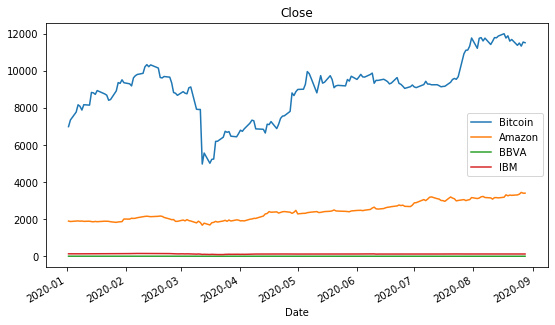

In [246]:
df6.plot(figsize = (9,5),title='Close')

## CSV

In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [216]:
dt = pd.read_csv('telecom.csv')
dt.info()
#import telecom file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [217]:
dt.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [218]:
dt['gender'] = np.where(dt['gender'] == 'Male', 1,0) #male = 1, female = 0
columns = ['Partner', 'Dependents', 'PhoneService','PaperlessBilling','Churn']

In [219]:
dt2 = dt.copy()

In [220]:
for i in columns:
    dt[i].replace(to_replace = 'Yes', value = 1,inplace = True)
    dt[i].replace(to_replace = 'No', value = 0,inplace = True )
#transforming the columns 

In [223]:
dt.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [224]:
dt['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [225]:
dt['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [226]:
dt['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [229]:
dt['TotalCharges'] = dt['TotalCharges'].replace(r'\s+', np.nan, regex = True)
dt['TotalCharges'] = pd.to_numeric(dt['TotalCharges'])
#cleaning totalcharges and transform to numeric

In [230]:
dt.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [231]:
dt = dt.fillna(0)

In [232]:
dt.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [233]:
print(len(dt))
print(len(dt[dt['Churn'] ==1])/len(dt)*100,'%  abandonan')
print(len(dt[dt['Churn'] ==0])/len(dt)*100,'%  se quedan')
#balancing the dataset

7043
26.536987079369588 %  abandonan
73.4630129206304 %  se quedan


In [234]:
churners_number = len(dt[dt['Churn'] == 1])
churners = (dt[dt['Churn']==1])
non_churners = dt[dt['Churn']==0].sample(n =churners_number)
df2 = churners.append(non_churners)

In [236]:
print(len(df2))
print(len(df2[df2['Churn'] ==1])/len(df2)*100,'%  abandonan')
print(len(df2[df2['Churn'] ==0])/len(df2)*100,'%  se quedan')
#result

3738
50.0 %  abandonan
50.0 %  se quedan


In [237]:
df2.corr()
#correlation

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.005272,-0.001375,0.002912,0.009829,-0.017666,0.001514,-0.007801,0.005792,0.008026
SeniorCitizen,-0.005272,1.000000,0.022905,-0.214743,0.014753,0.017542,0.151156,0.217148,0.095201,0.158147
Partner,-0.001375,0.022905,1.000000,0.440484,0.380100,0.017312,-0.039971,0.072397,0.313807,-0.178651
Dependents,0.002912,-0.214743,0.440484,1.000000,0.179490,-0.002852,-0.130557,-0.124992,0.080134,-0.209236
tenure,0.009829,0.014753,0.380100,0.179490,1.000000,0.005856,-0.021220,0.222829,0.857021,-0.392215
PhoneService,-0.017666,0.017542,0.017312,-0.002852,0.005856,1.000000,0.032890,0.311124,0.117235,0.029456
PaperlessBilling,0.001514,0.151156,-0.039971,-0.130557,-0.021220,0.032890,1.000000,0.357407,0.118407,0.227383
MonthlyCharges,-0.007801,0.217148,0.072397,-0.124992,0.222829,0.311124,0.357407,1.000000,0.581003,0.232035
TotalCharges,0.005792,0.095201,0.313807,0.080134,0.857021,0.117235,0.118407,0.581003,1.000000,-0.218259
Churn,0.008026,0.158147,-0.178651,-0.209236,-0.392215,0.029456,0.227383,0.232035,-0.218259,1.000000


In [238]:
lista_id = [i for i in df2['customerID']]
del df2['customerID']
df2 = df2.reset_index(drop = True)

In [239]:
from sklearn.preprocessing import LabelEncoder

In [240]:
le = LabelEncoder()
categorias = ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies','Contract', 'PaymentMethod']
#start label encoder

In [241]:
for i in categorias:
    df2[i] = le.fit_transform(df2[i])
#applying label encoder in columns

In [242]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
1,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
2,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50,1
3,0,0,1,0,28,1,2,1,0,0,2,2,2,2,0,1,2,104.80,3046.05,1
4,1,0,0,0,49,1,2,1,0,2,2,0,2,2,0,1,0,103.70,5036.30,1


In [243]:
for i in categorias:
    print(str(i),df2[i].unique())
#result in categorys is good

MultipleLines [0 2 1]
InternetService [0 1 2]
OnlineSecurity [2 0 1]
OnlineBackup [2 0 1]
DeviceProtection [0 2 1]
TechSupport [0 2 1]
StreamingTV [0 2 1]
StreamingMovies [0 2 1]
Contract [0 2 1]
PaymentMethod [3 2 0 1]


In [244]:
df2.to_csv('telecom_clean',sep = ',')
#export file